###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

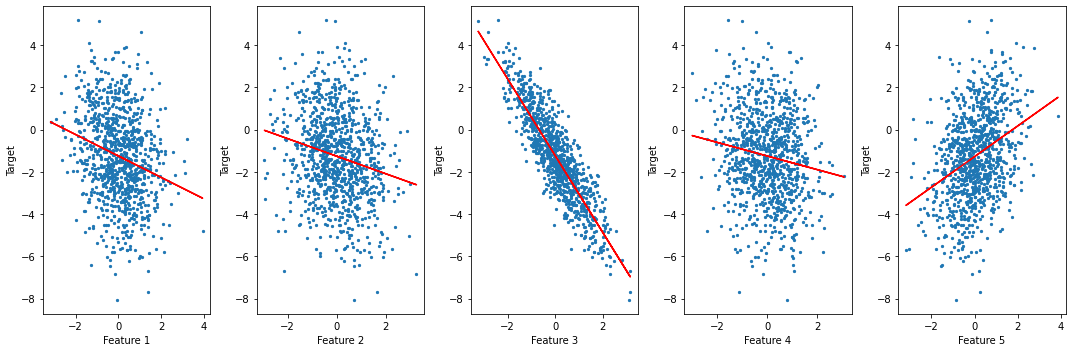

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Number of features
num_features = 5

# Generate random feature matrix
X = np.random.randn(num_samples, num_features)

# Generate random target column
# Here, we assume a linear relationship between the features and the target
# We will use a combination of the features to generate the target
true_coefficients = np.random.randn(num_features)
true_intercept = np.random.randn()

# Generate the target column using the true coefficients and intercept
y = np.dot(X, true_coefficients) + true_intercept

# Plotting the data
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

for i in range(num_features):
    ax = axes[i]
    ax.scatter(X[:, i], y, s=5)
    ax.set_xlabel(f"Feature {i+1}")
    ax.set_ylabel("Target")
    
    # Calculate the best fit line
    coefficients, residuals, _, _, _ = np.polyfit(X[:, i], y, deg=1, full=True)
    best_fit_line = np.polyval(coefficients, X[:, i])
    
    # Plot the best fit line
    ax.plot(X[:, i], best_fit_line, color='r')

plt.tight_layout()
plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

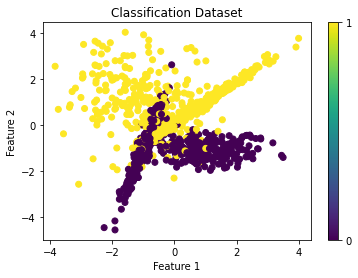

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Number of features
num_features = 2

# Number of classes
num_classes = 2

# Number of clusters per class
num_clusters = 2

# Generate the classification dataset
X, y = make_classification(n_samples=num_samples, n_features=num_features, 
                           n_informative=num_features, n_redundant=0, 
                           n_classes=num_classes, n_clusters_per_class=num_clusters)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification Dataset")
plt.colorbar(ticks=range(num_classes))
plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

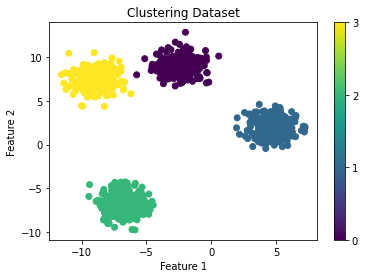

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Number of features
num_features = 2

# Number of clusters
num_clusters = 4

# Generate the clustering dataset
X, y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_clusters)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering Dataset")
plt.colorbar(ticks=range(num_clusters))
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the website
url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)

# Create BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing COVID-19 data
table = soup.find("table", id="main_table_countries_today")

# Extract table headers
headers = [header.text for header in table.select("thead th")]

# Initialize an empty list to store table rows
rows = []

# Extract table rows dynamically based on column index
for row in table.select("tbody tr"):
    data = [td.text for td in row.find_all("td")]
    rows.append(data)

# Create a Pandas dataframe with the extracted data
df = pd.DataFrame(rows, columns=headers)

# Filter and select the desired columns
columns_to_keep = [
    headers[0],  # Country
    headers[1],  # Continent
    headers[8],  # Population
    headers[2],  # TotalCases
    headers[3],  # NewCases
    headers[4],  # TotalDeaths
    headers[5],  # NewDeaths
    headers[6],  # TotalRecovered
    headers[7],  # NewRecovered
    headers[9]   # ActiveCases
]
df = df[columns_to_keep]

# Clean the data by removing commas and plus signs and converting the columns to integer
numeric_columns = columns_to_keep[2:]
df[numeric_columns] = df[numeric_columns].replace({",": "", "\\+": ""}, regex=True)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Display the resulting dataframe
print(df)


    #       Country,Other  ActiveCases  TotalCases  NewCases  TotalDeaths  \
0       \nNorth America\n    2519294.0   126648037     217.0    1632544.0   
1                \nAsia\n   14735201.0   217286137    6798.0    1546165.0   
2              \nEurope\n    1993533.0   249247865       NaN    2059483.0   
3       \nSouth America\n     858160.0    68674084       NaN    1355584.0   
4             \nOceania\n     143864.0    14309495       NaN      27779.0   
..  ..                ...          ...         ...       ...          ...   
242                Total:     858160.0    68674084       NaN    1355584.0   
243                Total:     143864.0    14309495       NaN      27779.0   
244                Total:     479245.0    12823223       NaN     258762.0   
245                Total:          0.0         721       NaN         15.0   
246                Total:   20729297.0   688989562    7015.0    6880332.0   

     NewDeaths  TotalRecovered  NewRecovered  Serious,Critical  
0         

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

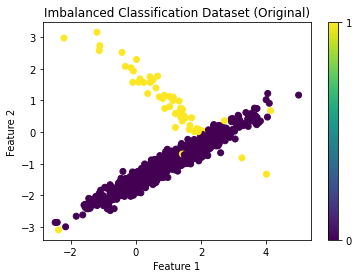

Class Distribution (Original): Counter({0: 945, 1: 55})


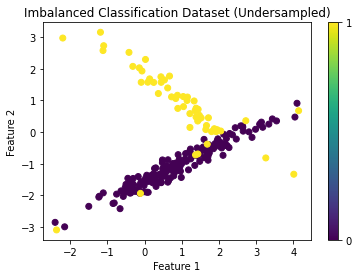

Class Distribution (Undersampled): Counter({0: 165, 1: 55})


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Number of features
num_features = 2

# Number of classes
num_classes = 2

# Number of clusters per class
num_clusters = 1

# Generate the imbalanced classification dataset
X, y = make_classification(n_samples=num_samples, n_features=num_features,
                           n_informative=num_features, n_redundant=0,
                           n_classes=num_classes, n_clusters_per_class=num_clusters,
                           weights=[0.95, 0.05])

# Plotting the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Imbalanced Classification Dataset (Original)")
plt.colorbar(ticks=range(num_classes))
plt.show()

# Check the class distribution using Counter
counter = Counter(y)
print("Class Distribution (Original):", counter)

# Undersample the majority class
majority_class = 0
minority_class = 1
undersampled_indices = np.random.choice(np.where(y == majority_class)[0], size=counter[minority_class] * 3, replace=False)
undersampled_X = np.concatenate((X[undersampled_indices], X[y == minority_class]), axis=0)
undersampled_y = np.concatenate((y[undersampled_indices], y[y == minority_class]), axis=0)

# Plotting the undersampled data
plt.scatter(undersampled_X[:, 0], undersampled_X[:, 1], c=undersampled_y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Imbalanced Classification Dataset (Undersampled)")
plt.colorbar(ticks=range(num_classes))
plt.show()

# Check the class distribution after undersampling using Counter
counter_undersampled = Counter(undersampled_y)
print("Class Distribution (Undersampled):", counter_undersampled)


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()

# Assign the feature data to X and target data to y
X = iris.data
y = iris.target

# Create a pandas DataFrame using X and feature names
df = pd.DataFrame(X, columns=iris.feature_names)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training and testing sets
print("\nDimensions of the training set:")
print(X_train.shape)
print("Dimensions of the testing set:")
print(X_test.shape)

# Standardize the feature data in the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation on the testing set
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set
df_train_scaled = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
print("\nFirst 5 rows of the standardized training set:")
print(df_train_scaled.head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of the training set:
(105, 4)
Dimensions of the testing set:
(45, 4)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671